In [1]:
#!pip install yfinance
#!pip install bs4
#!pip install nbformat
#!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
# Ignore all warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Tesla stock data extract

tsla = yf.Ticker('TSLA')
tesla_data = tsla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3898,2025-12-26 00:00:00-05:00,485.230011,489.089996,473.820007,475.190002,58780700,0.0,0.0
3899,2025-12-29 00:00:00-05:00,469.000000,469.399994,459.000000,459.640015,66263000,0.0,0.0
3900,2025-12-30 00:00:00-05:00,461.089996,463.119995,453.829987,454.429993,59238500,0.0,0.0
3901,2025-12-31 00:00:00-05:00,456.100006,456.549988,449.299988,449.720001,49078000,0.0,0.0


In [5]:
# Tesla revenue web scraping

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

In [6]:
date = []
rev = []

for row in soup.find('tbody').find_all('tr'):
  col = row.find_all('td')
  Date = col[0].text
  Revenue = col[1].text
  date.append(Date)
  rev.append(Revenue)

data = {
    'Date': date,
    'Revenue': rev
}

tesla_revenue = pd.DataFrame.from_dict(data)

# replace the symbols e.g. white space, $ also drop na
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue

<>:19: SyntaxWarning: invalid escape sequence '\$'
<>:19: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-314348471.py:19: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


In [7]:
# GME stock data extract

gme = yf.Ticker('GME')
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
6006,2025-12-26 00:00:00-05:00,21.500000,21.500000,20.959999,21.090000,3820400,0.0,0.0
6007,2025-12-29 00:00:00-05:00,21.040001,21.290001,20.459999,20.530001,6005600,0.0,0.0
6008,2025-12-30 00:00:00-05:00,20.530001,20.700001,20.350000,20.500000,4569500,0.0,0.0
6009,2025-12-31 00:00:00-05:00,20.450001,20.490000,19.990000,20.080000,6422300,0.0,0.0


In [8]:
# GME revenue web scraping

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

html_data_2 = requests.get(url).text
soup = BeautifulSoup(html_data_2, 'html.parser')

In [9]:
date = []
rev = []

for row in soup.find('tbody').find_all('tr'):
  col = row.find_all('td')
  Date = col[0].text
  Revenue = col[1].text
  date.append(Date)
  rev.append(Revenue)

data = {
    'Date': date,
    'Revenue': rev
}

gme_revenue = pd.DataFrame.from_dict(data)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-621354025.py:18: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)


,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364
5,2015,9296
6,2014,9040
7,2013,8887
8,2012,9551
9,2011,9474


In [11]:
# create function to plot the graphs

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

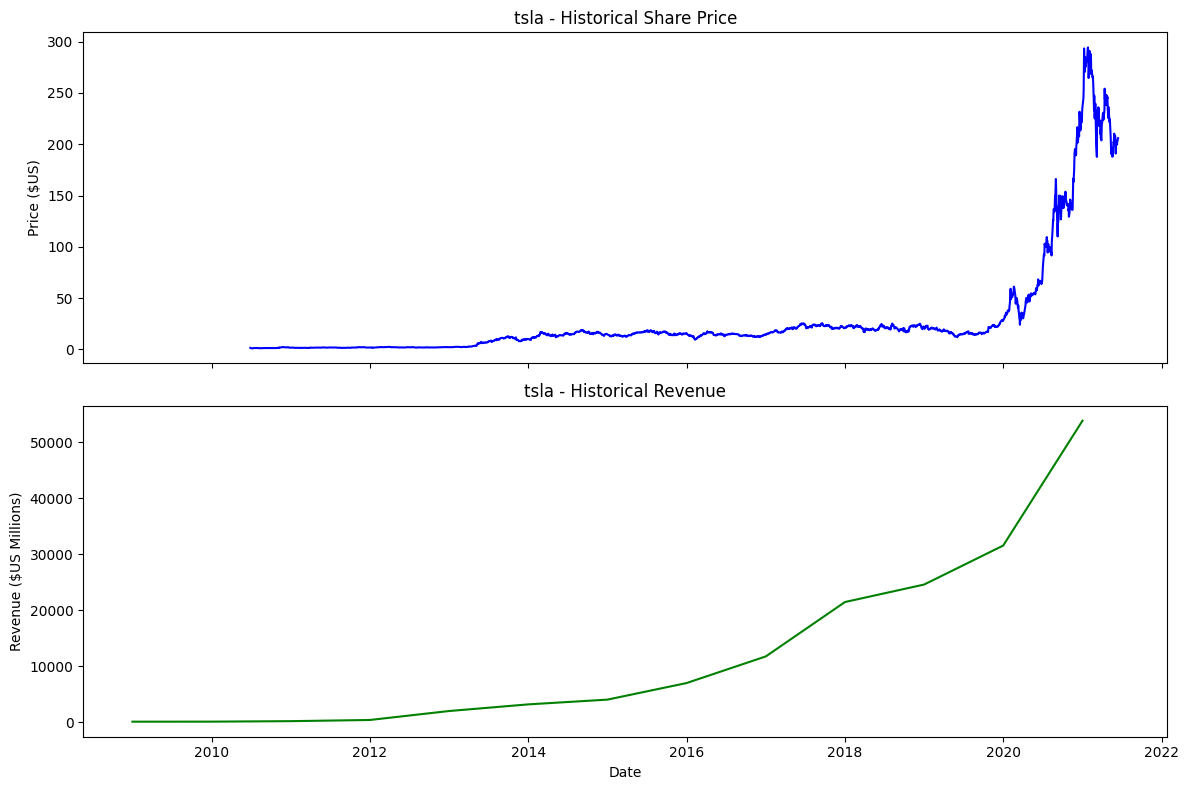

In [12]:
make_graph(tesla_data, tesla_revenue, 'tsla')

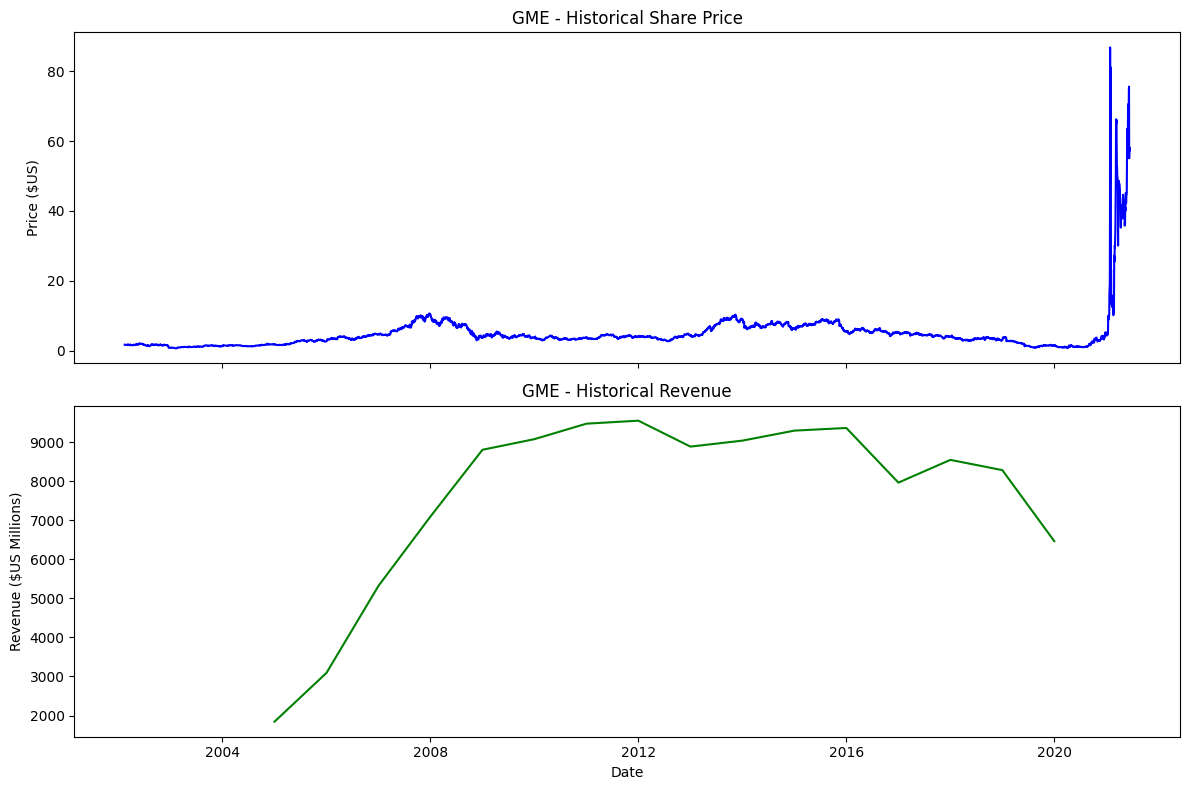

In [13]:
make_graph(gme_data, gme_revenue, 'GME')